# Breast Cancer Mortality and Survival Prediction

Notebook 3: Ensemble Learning and Regression Models

Author: Thanuja Liyanage

In [101]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [479]:
# import pandas and read two files name classificaion csv
classification_df = pd.read_csv('classification_dataset.csv')
regression_df = pd.read_csv('regression_dataset.csv')

print("Classification Dataset")
print(classification_df.head())

print("\nRegression Dataset")
print(regression_df.head())

Classification Dataset
   Month_of_Birth  Age  Sex  T_Stage  N_Stage  6th_Stage  Differentiated  \
0              12   68    1        0        0          0               1   
1              12   50    1        1        1          2               0   
2              11   58    1        2        2          4               0   
3               3   58    1        0        0          0               1   
4               1   47    1        1        0          1               1   

   Grade  A_Stage  Tumor_Size  Estrogen_Status  Progesterone_Status  \
0      3        1           4                1                    1   
1      2        1          35                1                    1   
2      2        1          63                1                    1   
3      3        1          18                1                    1   
4      3        1          41                1                    1   

   Regional_Node_Examined  Regional_Node_Positive  Mortality_Status  
0                    24

In [103]:
# Classification dataset split
from sklearn.model_selection import train_test_split
X_cls = classification_df.drop(columns=['Mortality_Status'])
y_cls = classification_df['Mortality_Status']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

print('\nClassification Dataset')
print('Whole DataSet Shape:', classification_df.shape)
print('X_train Shape:', X_train_cls.shape)
print('X_test Shape:', X_test_cls.shape)
print('y_train Shape:', y_train_cls.shape)
print('y_test Shape:', y_test_cls.shape)


Classification Dataset
Whole DataSet Shape: (3257, 15)
X_train Shape: (2605, 14)
X_test Shape: (652, 14)
y_train Shape: (2605,)
y_test Shape: (652,)


In [105]:
print("\nPART 1: ENSEMBLE CLASSIFICATION")

# Load the best models from Session 2
print("\nLoading best models from Session 2")

# Load the saved models
with open('naive_bayes_model.pkl', 'rb') as file:
    nb_model = pickle.load(file)

with open('logistic_regression_model.pkl', 'rb') as file:
    lr_model = pickle.load(file)

with open('knn_model.pkl', 'rb') as file:
    knn_model = pickle.load(file)

print("Models loaded successfully.")


PART 1: ENSEMBLE CLASSIFICATION

Loading best models from Session 2
Models loaded successfully.


In [106]:
# Function to evaluate classification models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a classification model
    """
    # Train the model if not pre-trained
    if not hasattr(model, 'classes_'):
        model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    auc = roc_auc_score(y_test, y_pred_prob)

    # Print metrics
    print(f"\n--- {model_name} Performance ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Alive', 'Dead'],
                yticklabels=['Alive', 'Dead'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Alive', 'Dead']))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return model, accuracy, precision, recall, f1, auc

In [107]:
# Review individual models' performance before creating ensemble
print("\nReviewing individual model performance")


Reviewing individual model performance



Naive Bayes Model

--- Naive Bayes Performance ---
Accuracy: 0.7715
Precision: 0.2345
Recall: 0.4722
F1 Score: 0.3134
AUC: 0.7092


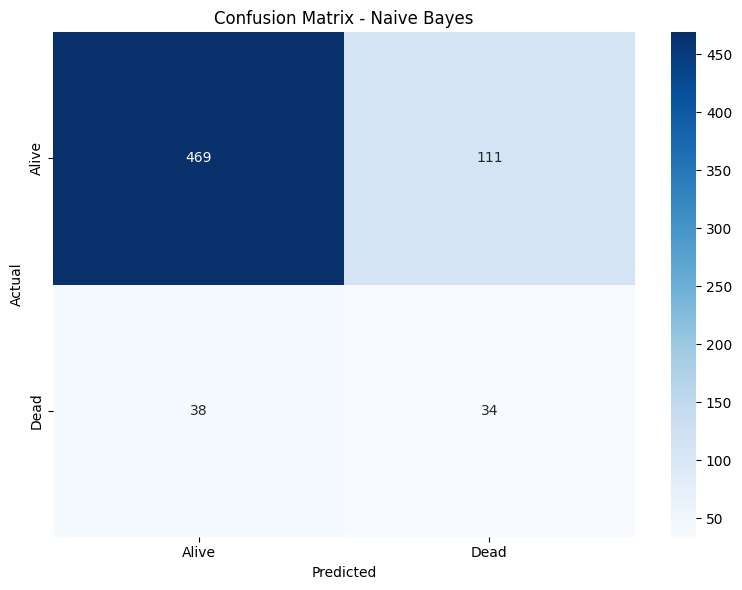


Classification Report:
              precision    recall  f1-score   support

       Alive       0.93      0.81      0.86       580
        Dead       0.23      0.47      0.31        72

    accuracy                           0.77       652
   macro avg       0.58      0.64      0.59       652
weighted avg       0.85      0.77      0.80       652



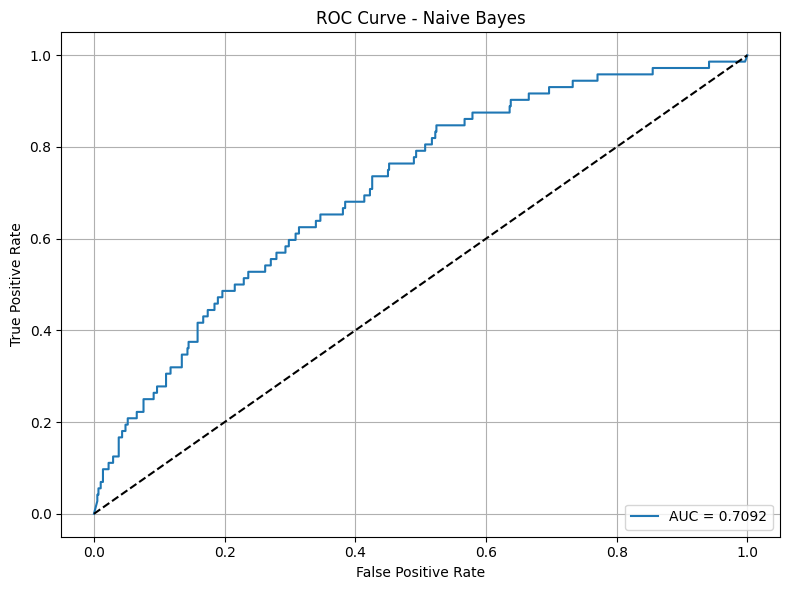

In [108]:
# Evaluate naive bayes model
print("\nNaive Bayes Model")
_, nb_accuracy, nb_precision, nb_recall, nb_f1, nb_auc = evaluate_model(
    nb_model, X_train_cls, X_test_cls, y_train_cls, y_test_cls, "Naive Bayes")


Logistic Regression Model

--- Logistic Regression Performance ---
Accuracy: 0.8911
Precision: 1.0000
Recall: 0.0139
F1 Score: 0.0274
AUC: 0.6986


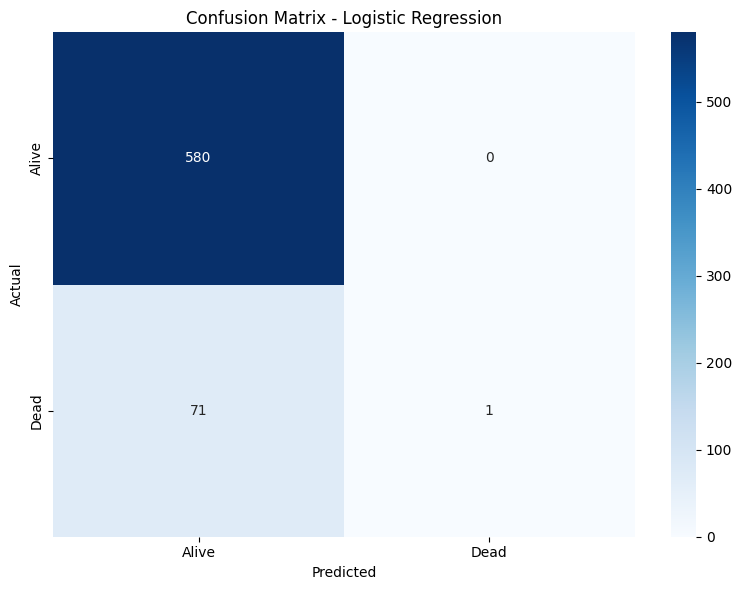


Classification Report:
              precision    recall  f1-score   support

       Alive       0.89      1.00      0.94       580
        Dead       1.00      0.01      0.03        72

    accuracy                           0.89       652
   macro avg       0.95      0.51      0.48       652
weighted avg       0.90      0.89      0.84       652



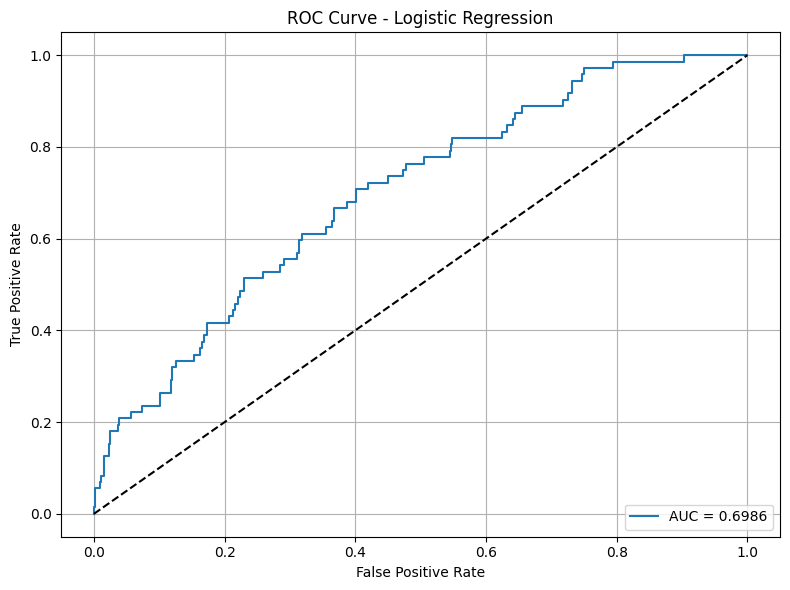

In [109]:
# Evaluate logistic regression model
print("\nLogistic Regression Model")
_, lr_accuracy, lr_precision, lr_recall, lr_f1, lr_auc = evaluate_model(
    lr_model, X_train_cls, X_test_cls, y_train_cls, y_test_cls, "Logistic Regression")


K-Nearest Neighbors Model

--- K-Nearest Neighbors Performance ---
Accuracy: 0.8865
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC: 0.5635


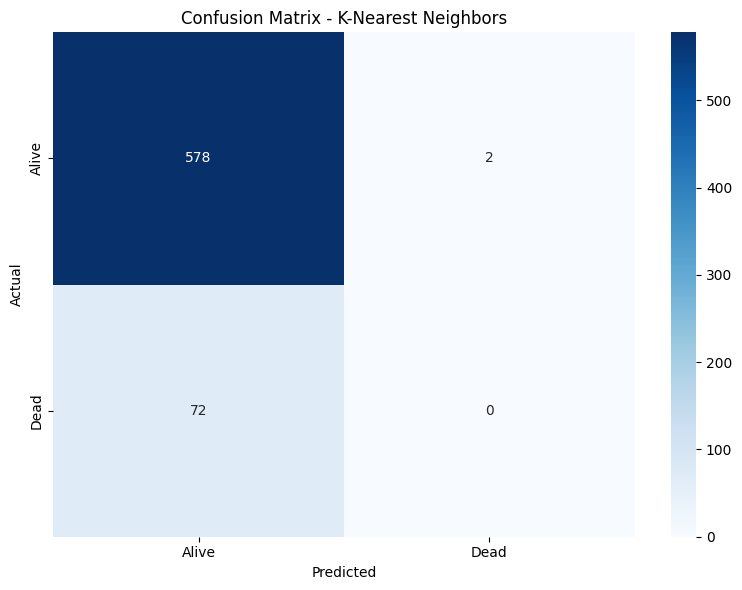


Classification Report:
              precision    recall  f1-score   support

       Alive       0.89      1.00      0.94       580
        Dead       0.00      0.00      0.00        72

    accuracy                           0.89       652
   macro avg       0.44      0.50      0.47       652
weighted avg       0.79      0.89      0.84       652



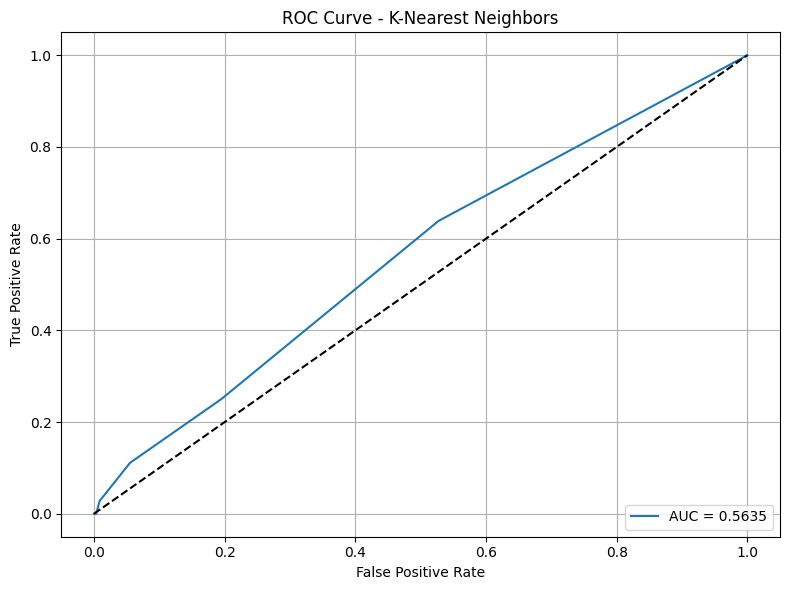

In [110]:
# Evaluate knn model
print("\nK-Nearest Neighbors Model")
_, knn_accuracy, knn_precision, knn_recall, knn_f1, knn_auc = evaluate_model(
    knn_model, X_train_cls, X_test_cls, y_train_cls, y_test_cls, "K-Nearest Neighbors")

In [111]:
# Create dataframe to compare models
individual_models = ['Naive Bayes', 'Logistic Regression', 'K-Nearest Neighbors']
individual_accuracy = [nb_accuracy, lr_accuracy, knn_accuracy]
individual_precision = [nb_precision, lr_precision, knn_precision]
individual_recall = [nb_recall, lr_recall, knn_recall]
individual_f1 = [nb_f1, lr_f1, knn_f1]
individual_auc = [nb_auc, lr_auc, knn_auc]

individual_results_df = pd.DataFrame({
    'Model': individual_models,
    'Accuracy': individual_accuracy,
    'Precision': individual_precision,
    'Recall': individual_recall,
    'F1 Score': individual_f1,
    'AUC': individual_auc
})

print("\nIndividual Model Comparison:")
print(individual_results_df)


Individual Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0          Naive Bayes  0.771472   0.234483  0.472222  0.313364  0.709243
1  Logistic Regression  0.891104   1.000000  0.013889  0.027397  0.698587
2  K-Nearest Neighbors  0.886503   0.000000  0.000000  0.000000  0.563530


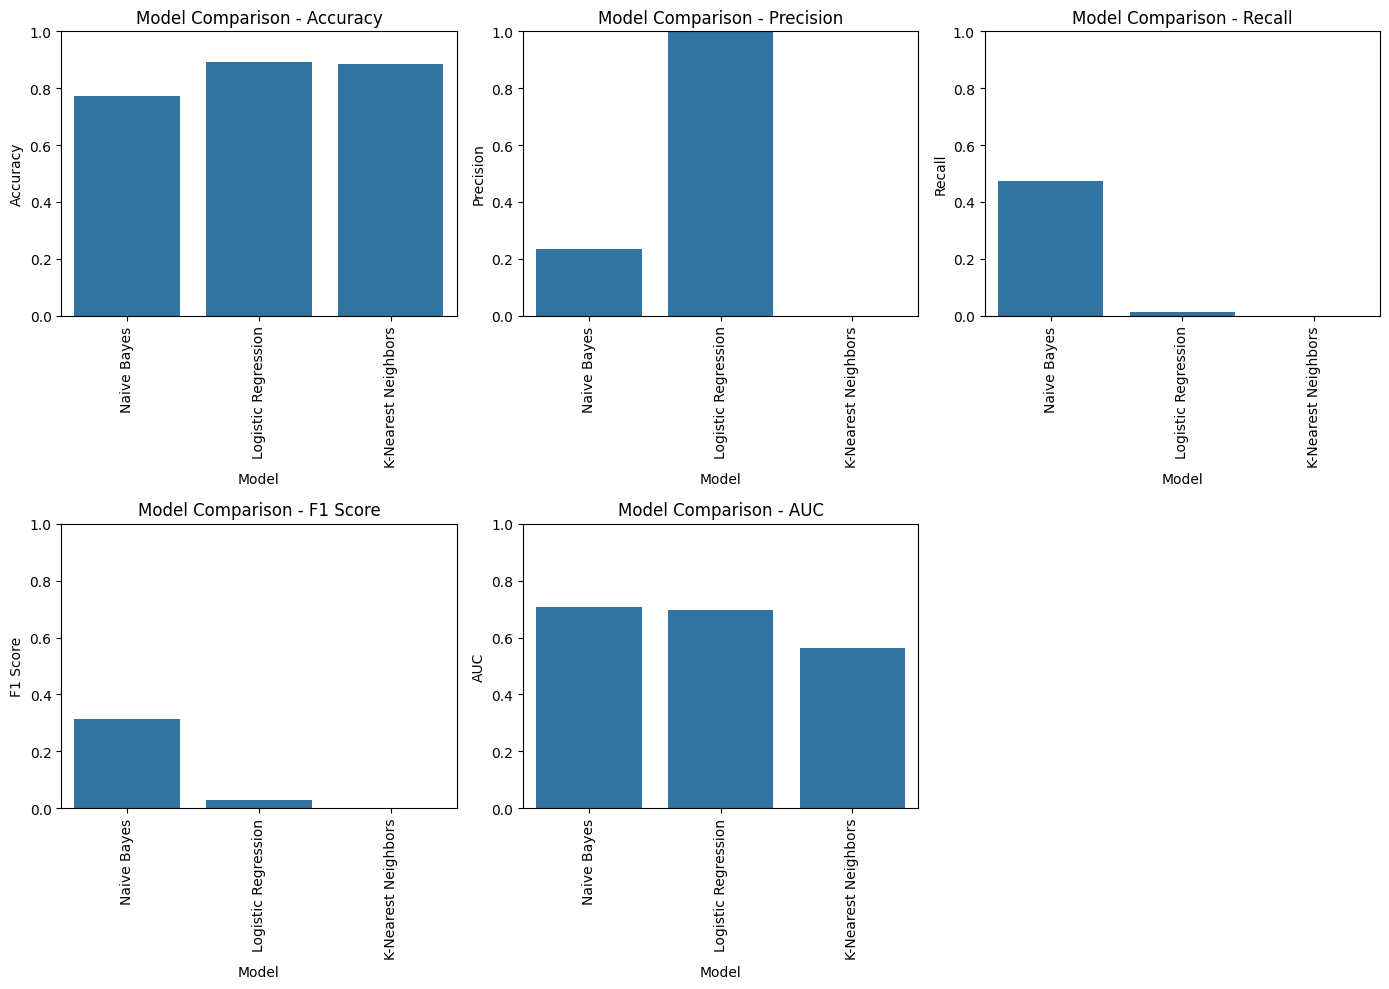

In [112]:
# Visualize individual model comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Model', y=metric, data=individual_results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [113]:
# Select the two best models for the ensemble based on AUC score
print("\nSelecting the two best models for ensemble based on AUC score...")

# Sort models by AUC score
sorted_indices = np.argsort(individual_auc)[::-1]
best_models_indices = sorted_indices[:2]
best_models_names = [individual_models[i] for i in best_models_indices]

print(f"Selected models for ensemble: {best_models_names}")


Selecting the two best models for ensemble based on AUC score...
Selected models for ensemble: ['Naive Bayes', 'Logistic Regression']


In [114]:
# Create dictionaries for ensemble creation
model_dict = {
    'Naive Bayes': nb_model,
    'Logistic Regression': lr_model,
    'K-Nearest Neighbors': knn_model
}

In [115]:
# Create the ensemble with selected models
selected_models = [(name, model_dict[name]) for name in best_models_names]

In [116]:
# Create a voting classifier with soft voting (using predicted probabilities)
voting_classifier = VotingClassifier(
    estimators=selected_models,
    voting='soft'  # 'soft' uses predicted probabilities, 'hard' uses predicted class labels
)


Training Ensemble Model

--- Ensemble Classifier Performance ---
Accuracy: 0.8466
Precision: 0.2812
Recall: 0.2500
F1 Score: 0.2647
AUC: 0.7111


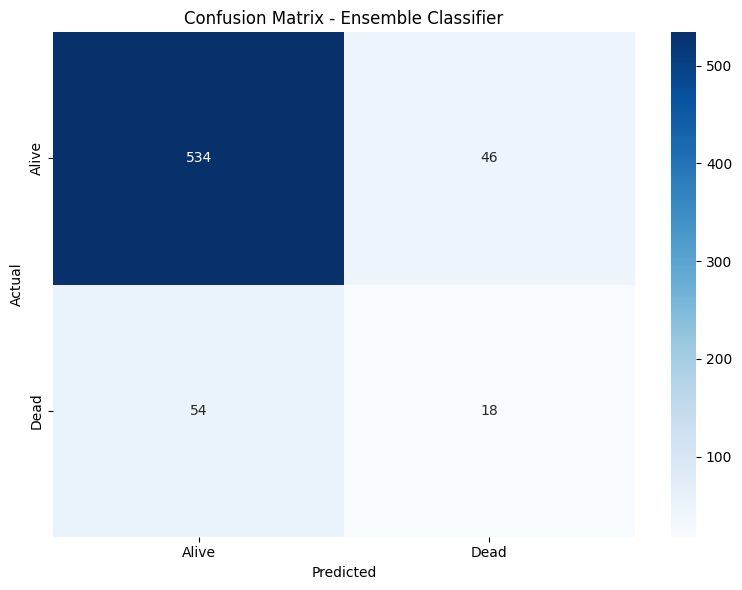


Classification Report:
              precision    recall  f1-score   support

       Alive       0.91      0.92      0.91       580
        Dead       0.28      0.25      0.26        72

    accuracy                           0.85       652
   macro avg       0.59      0.59      0.59       652
weighted avg       0.84      0.85      0.84       652



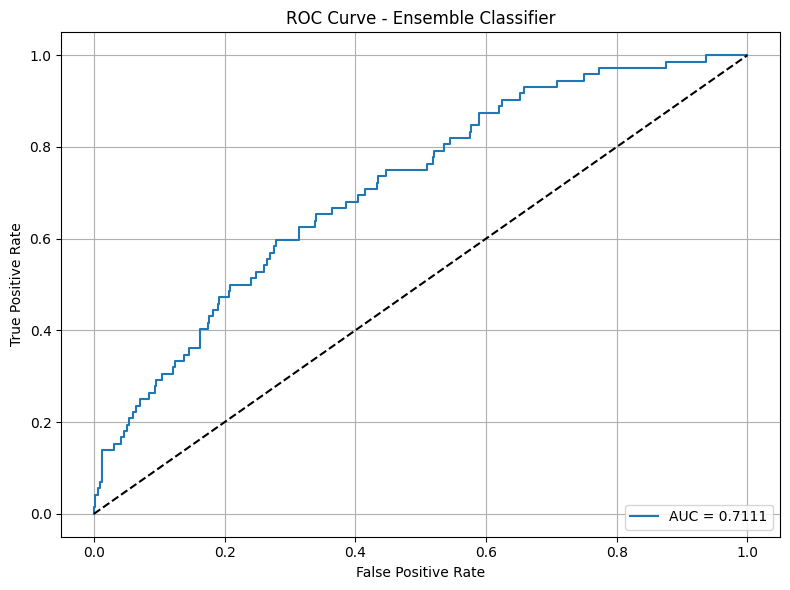

In [117]:
# Train and evaluate ensemble model
print("\nTraining Ensemble Model")
ensemble_model, ensemble_accuracy, ensemble_precision, ensemble_recall, ensemble_f1, ensemble_auc = evaluate_model(
    voting_classifier, X_train_cls, X_test_cls, y_train_cls, y_test_cls, "Ensemble Classifier")


In [118]:
# Compare ensemble with individual models
all_models = individual_models + ['Ensemble']
all_accuracy = individual_accuracy + [ensemble_accuracy]
all_precision = individual_precision + [ensemble_precision]
all_recall = individual_recall + [ensemble_recall]
all_f1 = individual_f1 + [ensemble_f1]
all_auc = individual_auc + [ensemble_auc]

all_results_df = pd.DataFrame({
    'Model': all_models,
    'Accuracy': all_accuracy,
    'Precision': all_precision,
    'Recall': all_recall,
    'F1 Score': all_f1,
    'AUC': all_auc
})

print("\nComparison with Ensemble Model:")
print(all_results_df)


Comparison with Ensemble Model:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0          Naive Bayes  0.771472   0.234483  0.472222  0.313364  0.709243
1  Logistic Regression  0.891104   1.000000  0.013889  0.027397  0.698587
2  K-Nearest Neighbors  0.886503   0.000000  0.000000  0.000000  0.563530
3             Ensemble  0.846626   0.281250  0.250000  0.264706  0.711063


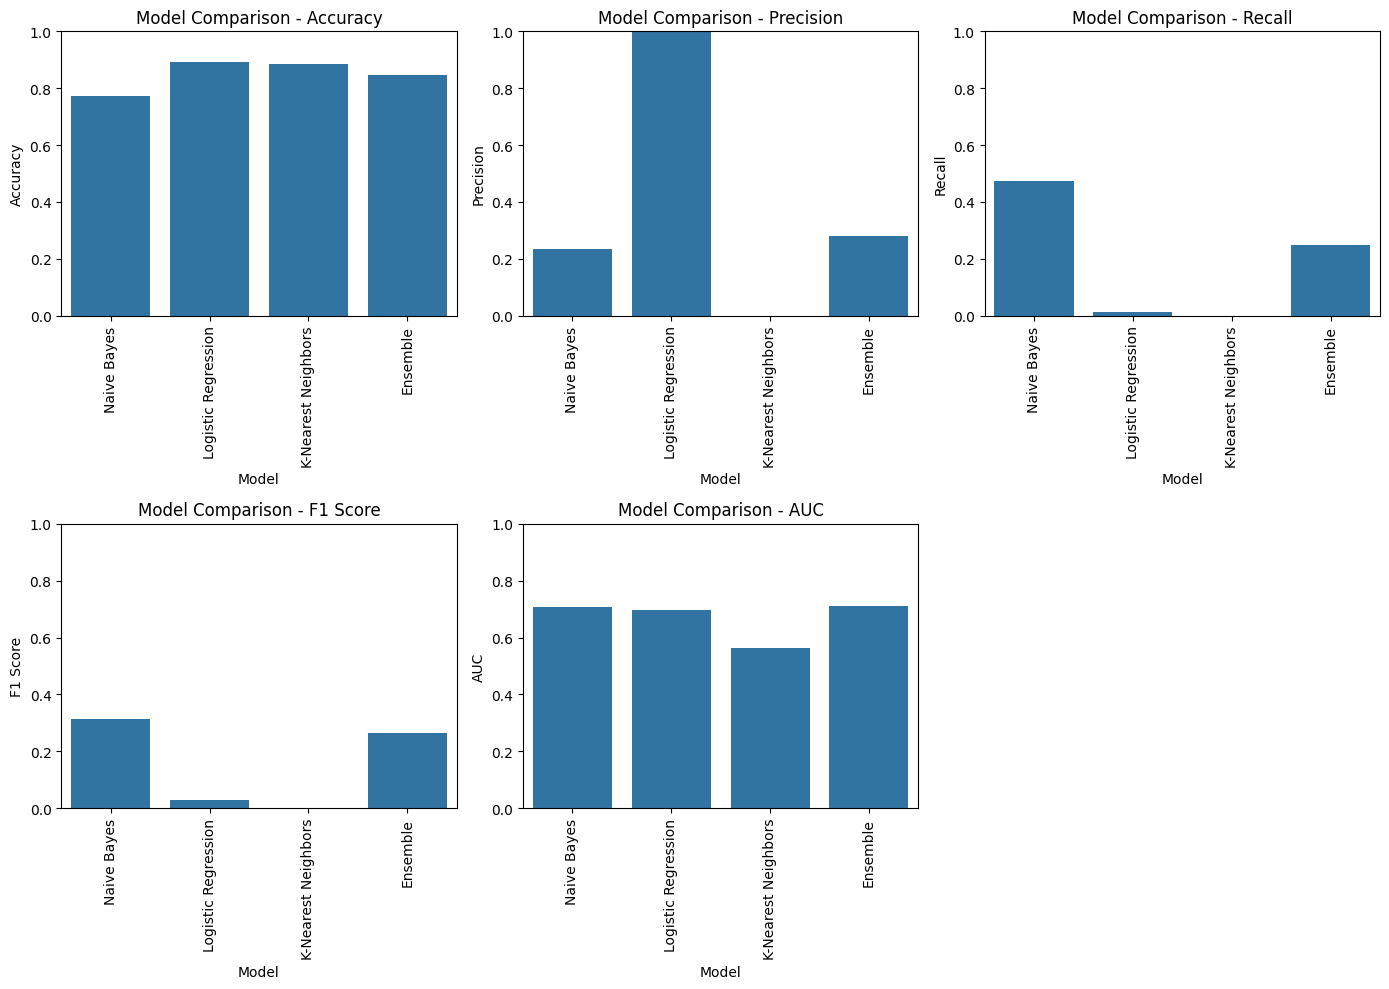

In [119]:
# Visualize ensemble vs individual model comparison
plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Model', y=metric, data=all_results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [120]:
# Save the ensemble model
with open('ensemble_classifier_model.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)

print("\nEnsemble model saved successfully.")


Ensemble model saved successfully.


# Decision Tree Regression

In [431]:
# # Feature Engineering
# regression_df['Estrogen_Tumor'] = regression_df['Estrogen_Status'] * regression_df['Tumor_Size']
# regression_df['Positive_Node_Ratio'] = regression_df['Regional_Node_Positive'] / (regression_df['Regional_Node_Examined'] + 1e-5)

# # Drop less important or zero-importance features (from pruned tree)
# features_to_drop = [
#     'Sex', 'Month_of_Birth', 'Age',
#     '6th_Stage', 'N_Stage', 'T_Stage',
#     'Differentiated', 'Grade', 'Progesterone_Status', 'A_Stage',
#     'Regional_Node_Positive'
# ]
# regression_df = regression_df.drop(columns=features_to_drop)

# # Now proceed with the dataset split
# X_reg = regression_df.drop(columns=['Survival_Months'])
# y_reg = regression_df['Survival_Months']

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
#     X_reg, y_reg, test_size=0.2, random_state=42
# )

# # Print the shapes of the data
# print('\nRegression Dataset')
# print('Whole DataSet Shape:', regression_df.shape)
# print('X_train Shape:', X_train_reg.shape)
# print('X_test Shape:', X_test_reg.shape)
# print('y_train Shape:', y_train_reg.shape)
# print('y_test Shape:', y_test_reg.shape)

In [480]:
# Regression dataset split
X_reg = regression_df.drop(columns=['Survival_Months'])
y_reg = regression_df['Survival_Months']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print('\nRegression Dataset')
print('Whole DataSet Shape:', regression_df.shape)
print('X_train Shape:', X_train_reg.shape)
print('X_test Shape:', X_test_reg.shape)
print('y_train Shape:', y_train_reg.shape)
print('y_test Shape:', y_test_reg.shape)


Regression Dataset
Whole DataSet Shape: (3257, 15)
X_train Shape: (2605, 14)
X_test Shape: (652, 14)
y_train Shape: (2605,)
y_test Shape: (652,)


In [481]:
print("\nPART 2: DECISION TREE REGRESSION")

# Function to evaluate regression models
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a regression model
    """
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate metrics for test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print metrics
    print(f"\n--- {model_name} Performance ---")
    print(f"Training set metrics:")
    print(f"MSE: {train_mse:.4f}")
    print(f"RMSE: {train_rmse:.4f}")
    print(f"MAE: {train_mae:.4f}")
    print(f"R² Score: {train_r2:.4f}")

    print(f"\nTest set metrics:")
    print(f"MSE: {test_mse:.4f}")
    print(f"RMSE: {test_rmse:.4f}")
    print(f"MAE: {test_mae:.4f}")
    print(f"R² Score: {test_r2:.4f}")

    # Plot predicted vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Survival Months')
    plt.ylabel('Predicted Survival Months')
    plt.title(f'Actual vs Predicted Survival Months - {model_name}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Return metrics for comparison
    return model, test_mse, test_rmse, test_mae, test_r2


PART 2: DECISION TREE REGRESSION



Building Fully-Grown Decision Tree Regressor

--- Fully-Grown Decision Tree Performance ---
Training set metrics:
MSE: 0.5514
RMSE: 0.7426
MAE: 0.0250
R² Score: 0.9988

Test set metrics:
MSE: 836.3685
RMSE: 28.9200
MAE: 23.3796
R² Score: -0.9751


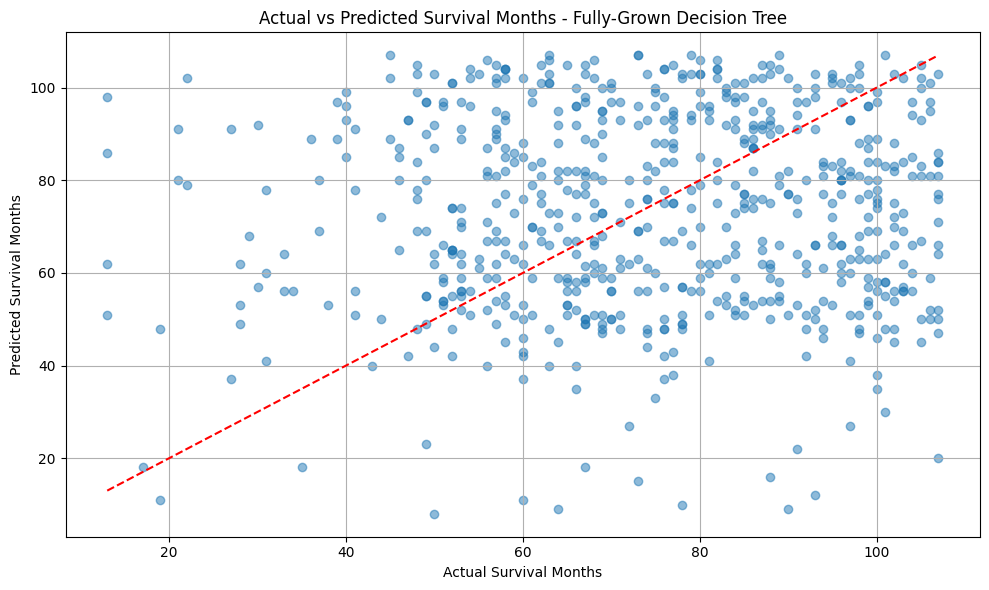

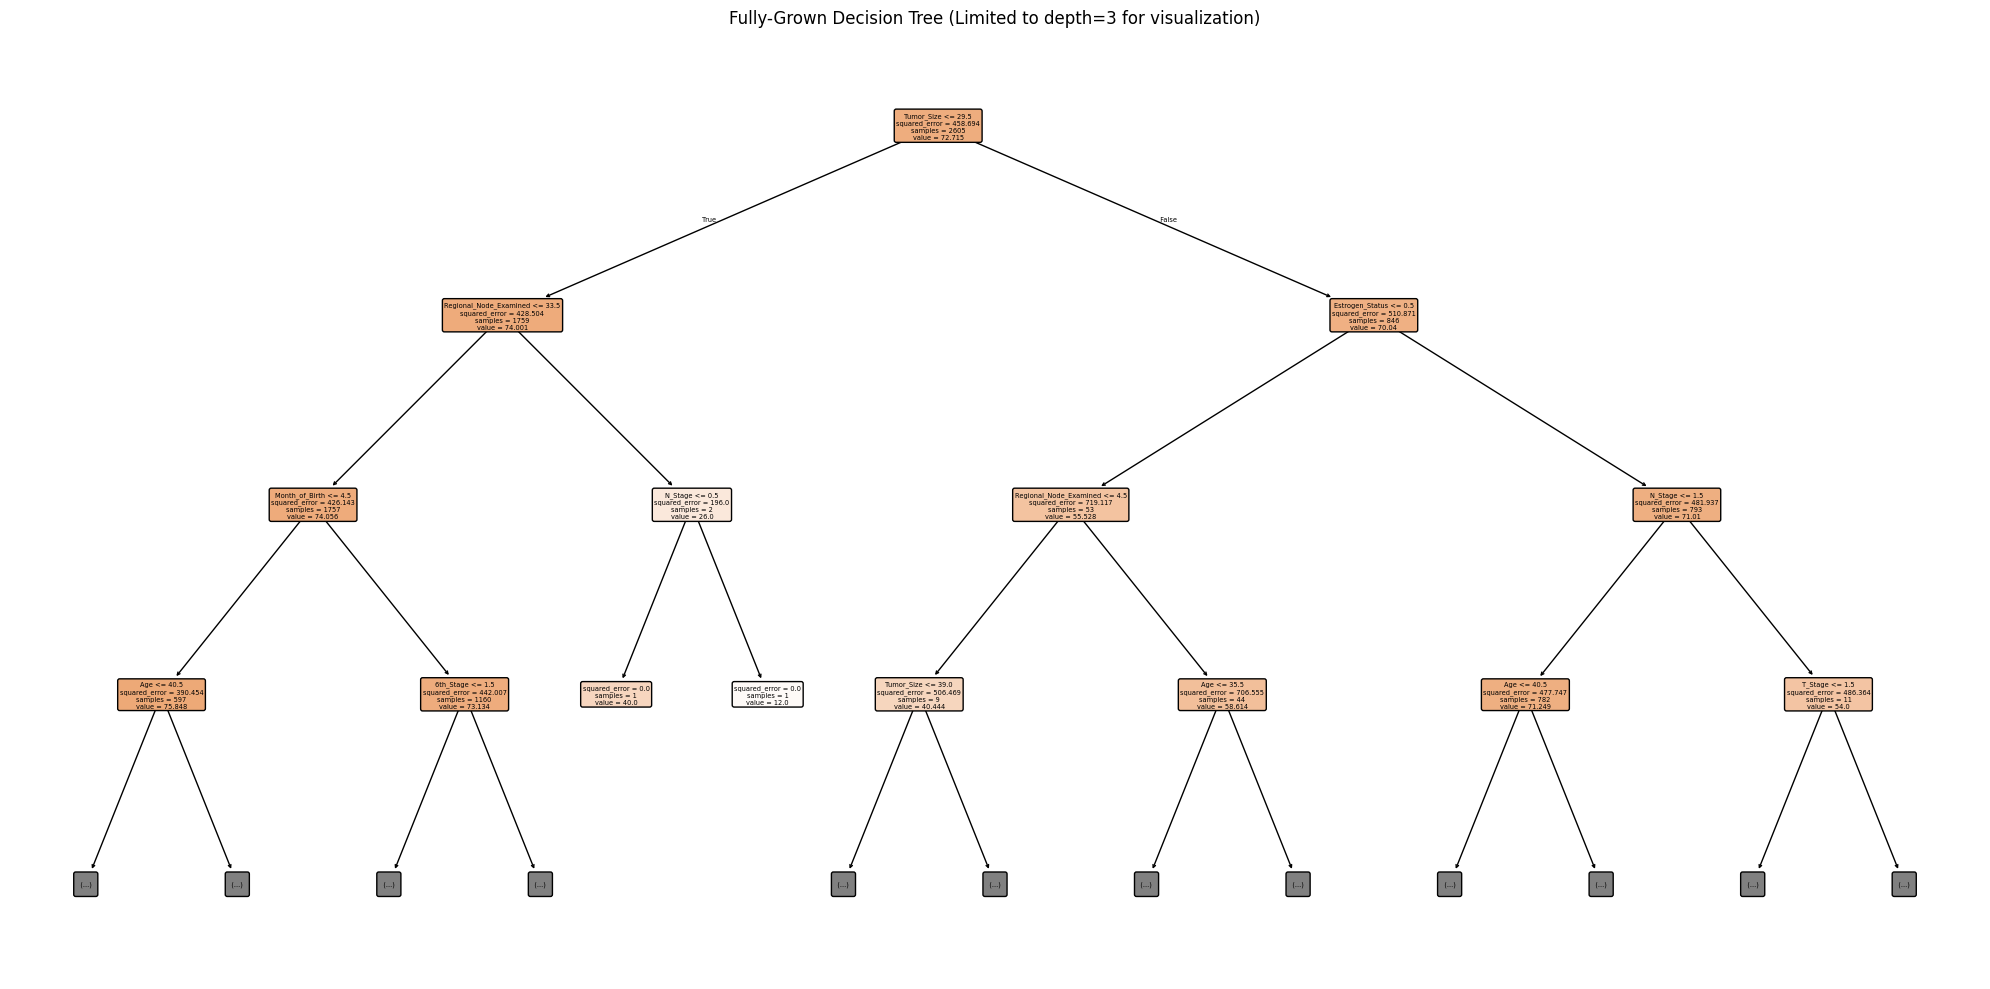

In [482]:
# 1. Fully-Grown Decision Tree Regressor (No pruning)
print("\nBuilding Fully-Grown Decision Tree Regressor")
dt_full = DecisionTreeRegressor(random_state=42)
dt_full, dt_full_mse, dt_full_rmse, dt_full_mae, dt_full_r2 = evaluate_regression_model(
    dt_full, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Fully-Grown Decision Tree")

# Visualize the fully-grown tree (limited to max_depth=3 for visibility)
plt.figure(figsize=(20, 10))
plot_tree(dt_full, max_depth=3, feature_names=X_train_reg.columns, filled=True, rounded=True)
plt.title('Fully-Grown Decision Tree (Limited to depth=3 for visualization)')
plt.tight_layout()
plt.show()

In [483]:
# Get feature importance for fully-grown tree
feature_importance_full = pd.DataFrame({
    'Feature': X_train_reg.columns,
    'Importance': dt_full.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance from Fully-Grown Decision Tree:")
print(feature_importance_full.head(10))  # Show top 10 features


Feature Importance from Fully-Grown Decision Tree:
                   Feature  Importance
1                      Age    0.226429
12  Regional_Node_Examined    0.222308
9               Tumor_Size    0.181110
0           Month_of_Birth    0.116153
13  Regional_Node_Positive    0.078872
7                    Grade    0.042695
11     Progesterone_Status    0.031400
6           Differentiated    0.031108
10         Estrogen_Status    0.023462
3                  T_Stage    0.015992


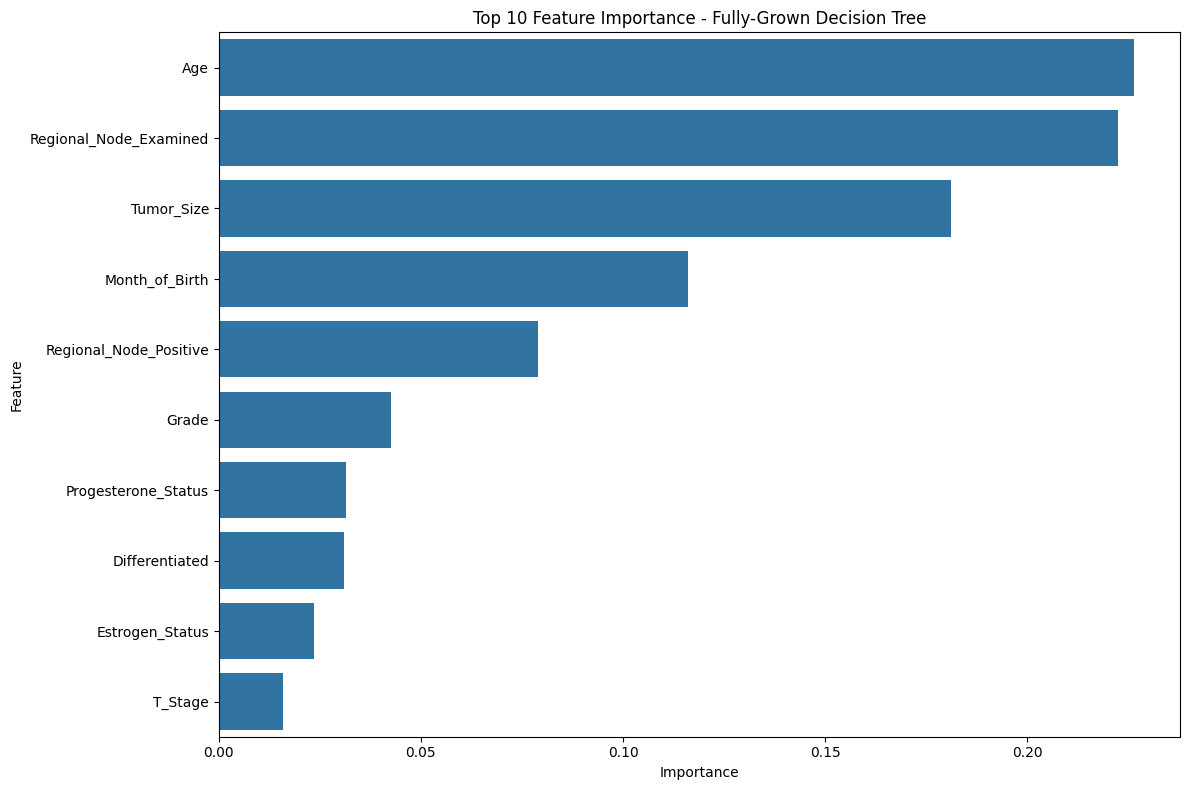

In [484]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_full.head(10))
plt.title('Top 10 Feature Importance - Fully-Grown Decision Tree')
plt.tight_layout()
plt.show()

In [485]:
#Set up the parameter grid for tuning
param_grid = {
    'max_depth': [4, 5, 7, 10, 15, None],  # Increasing max_depth to allow deeper trees
    'min_samples_split': [2, 5, 10, 20],   # Adjusting split to prevent overfitting
    'min_samples_leaf': [1, 2, 4, 10],     # Ensuring leaves are not too small
    'max_features': ['auto', 'sqrt', 'log2', None],  # Trying different feature selections
    'max_leaf_nodes': [None, 10, 20, 50],  # Limiting leaf nodes for a more controlled tree
    'criterion': ['mse', 'friedman_mse', 'mae'],  # Different split criteria for better model performance
    'splitter': ['best', 'random']  # Split strategy
}

dt_grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
dt_grid_search.fit(X_train_reg, y_train_reg)

# Print best parameters and score
print(f"Best parameters: {dt_grid_search.best_params_}")
print(f"Best cross-validation negative MSE: {dt_grid_search.best_score_:.4f}")
print(f"Best cross-validation RMSE: {np.sqrt(-dt_grid_search.best_score_):.4f}")

Best parameters: {'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best cross-validation negative MSE: -457.9307
Best cross-validation RMSE: 21.3993



--- Pruned Decision Tree Performance ---
Training set metrics:
MSE: 452.6480
RMSE: 21.2755
MAE: 17.6063
R² Score: 0.0132

Test set metrics:
MSE: 428.6868
RMSE: 20.7048
MAE: 17.3129
R² Score: -0.0124


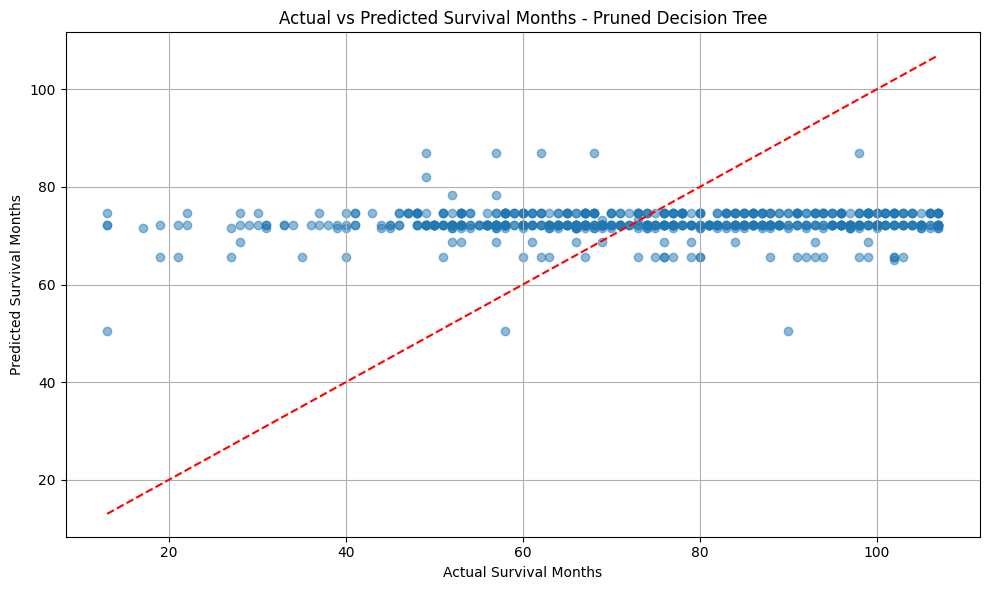

In [486]:
# Create and evaluate pruned tree with best parameters
dt_pruned = dt_grid_search.best_estimator_
dt_pruned, dt_pruned_mse, dt_pruned_rmse, dt_pruned_mae, dt_pruned_r2 = evaluate_regression_model(
    dt_pruned, X_train_reg, X_test_reg, y_train_reg, y_test_reg, "Pruned Decision Tree")

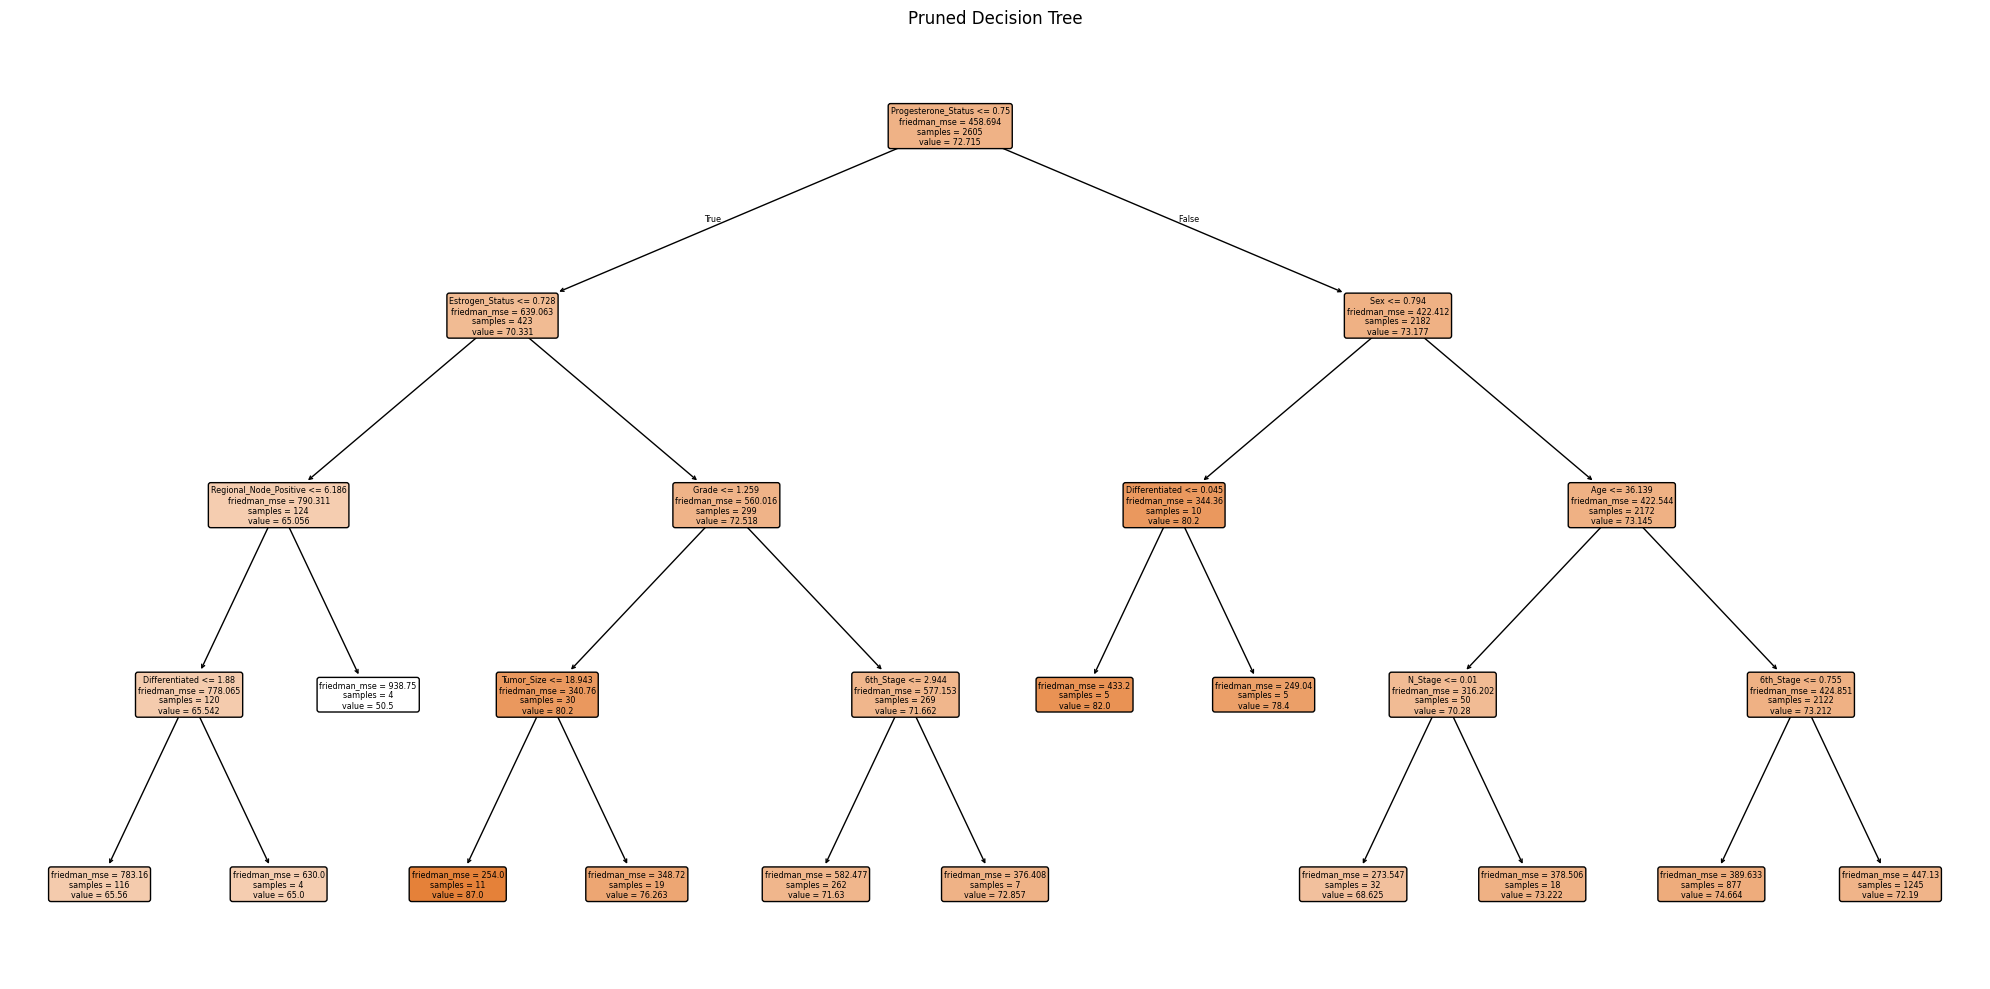

In [487]:
# Visualize the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(dt_pruned, feature_names=X_train_reg.columns, filled=True, rounded=True)
plt.title('Pruned Decision Tree')
plt.tight_layout()
plt.show()

In [488]:
# Get feature importance for pruned tree
feature_importance_pruned = pd.DataFrame({
    'Feature': X_train_reg.columns,
    'Importance': dt_pruned.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance from Pruned Decision Tree:")
print(feature_importance_pruned.head(10))  # Show top 10 features


Feature Importance from Pruned Decision Tree:
                   Feature  Importance
10         Estrogen_Status    0.309886
5                6th_Stage    0.200635
11     Progesterone_Status    0.182214
7                    Grade    0.124937
13  Regional_Node_Positive    0.055611
9               Tumor_Size    0.050995
2                      Sex    0.031463
1                      Age    0.026665
4                  N_Stage    0.015459
6           Differentiated    0.002134


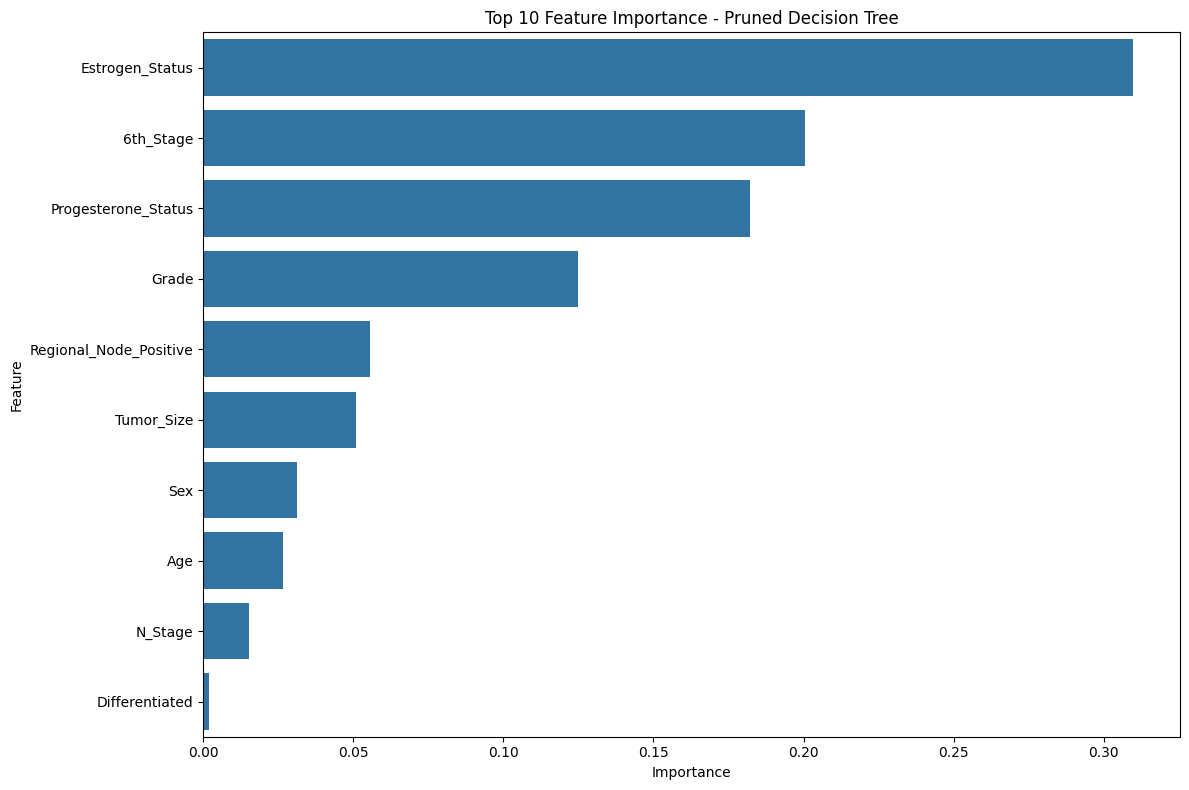

In [489]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_pruned.head(10))
plt.title('Top 10 Feature Importance - Pruned Decision Tree')
plt.tight_layout()
plt.show()

In [490]:
# Compare full and pruned tree performance
dt_models = ['Fully-Grown Decision Tree', 'Pruned Decision Tree']
dt_mse = [dt_full_mse, dt_pruned_mse]
dt_rmse = [dt_full_rmse, dt_pruned_rmse]
dt_mae = [dt_full_mae, dt_pruned_mae]
dt_r2 = [dt_full_r2, dt_pruned_r2]

dt_results_df = pd.DataFrame({
    'Model': dt_models,
    'MSE': dt_mse,
    'RMSE': dt_rmse,
    'MAE': dt_mae,
    'R² Score': dt_r2
})

print("\nDecision Tree Model Comparison:")
print(dt_results_df)


Decision Tree Model Comparison:
                       Model         MSE       RMSE        MAE  R² Score
0  Fully-Grown Decision Tree  836.368482  28.920036  23.379601 -0.975127
1       Pruned Decision Tree  428.686769  20.704752  17.312899 -0.012366


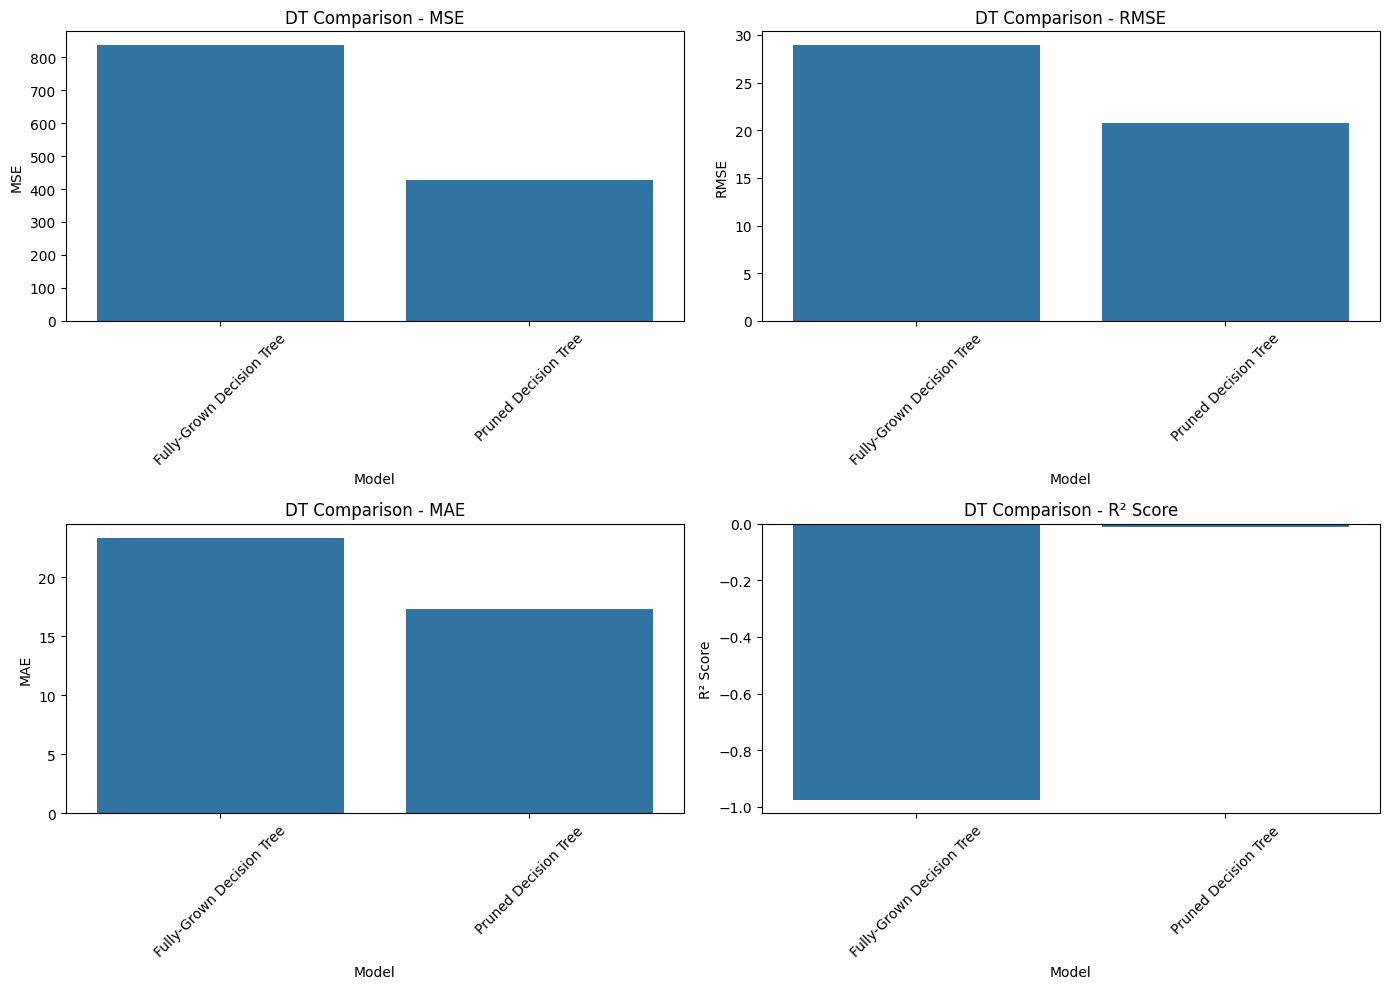

In [491]:
# Visualize decision tree model comparison
dt_metrics = ['MSE', 'RMSE', 'MAE']
plt.figure(figsize=(14, 10))
for i, metric in enumerate(dt_metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, data=dt_results_df)
    plt.title(f'DT Comparison - {metric}')
    plt.xticks(rotation=45)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='R² Score', data=dt_results_df)
plt.title('DT Comparison - R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [492]:
# Save the best regression model (based on R² score)
best_dt_model = dt_pruned if dt_pruned_r2 > dt_full_r2 else dt_full
best_dt_name = "Pruned Decision Tree" if dt_pruned_r2 > dt_full_r2 else "Fully-Grown Decision Tree"

with open('best_dt_regression_model.pkl', 'wb') as file:
    pickle.dump(best_dt_model, file)

print(f"\nBest Decision Tree Regression Model ({best_dt_name}) saved successfully.")


Best Decision Tree Regression Model (Pruned Decision Tree) saved successfully.


In [493]:
# Summary of modeling results
print("\nOVERALL SUMMARY")
print("\n1. Ensemble Classification Model:")
print(f"Selected base learners: {best_models_names}")
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")
print(f"Ensemble AUC: {ensemble_auc:.4f}")
best_individual = all_results_df.iloc[:-1]['AUC'].idxmax()
best_individual_name = all_results_df.iloc[best_individual]['Model']
print(f"Best individual model: {best_individual_name} (AUC: {all_results_df.iloc[best_individual]['AUC']:.4f})")
print(f"Ensemble improvement over best individual: {ensemble_auc - all_results_df.iloc[best_individual]['AUC']:.4f}")

print("\n2. Decision Tree Regression Model:")
print(f"Best Decision Tree: {best_dt_name}")
print(f"RMSE: {dt_results_df.iloc[dt_results_df['R² Score'].idxmax()]['RMSE']:.4f}")
print(f"R² Score: {dt_results_df.iloc[dt_results_df['R² Score'].idxmax()]['R² Score']:.4f}")

print("\nEnd of Analysis")


OVERALL SUMMARY

1. Ensemble Classification Model:
Selected base learners: ['Naive Bayes', 'Logistic Regression']
Ensemble Accuracy: 0.8466
Ensemble AUC: 0.7111
Best individual model: Naive Bayes (AUC: 0.7092)
Ensemble improvement over best individual: 0.0018

2. Decision Tree Regression Model:
Best Decision Tree: Pruned Decision Tree
RMSE: 20.7048
R² Score: -0.0124

End of Analysis


In [494]:
from IPython.display import display

display(regression_df)


,Month_of_Birth,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months
0,12,68,1,0,0,0,1,3,1,4,1,1,24.0,1,60
1,12,50,1,1,1,2,0,2,1,35,1,1,14.0,5,62
2,11,58,1,2,2,4,0,2,1,63,1,1,14.0,7,75
3,3,58,1,0,0,0,1,3,1,18,1,1,2.0,1,84
4,1,47,1,1,0,1,1,3,1,41,1,1,3.0,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,1,62,1,0,0,0,0,2,1,9,1,1,1.0,1,49
3253,5,56,1,1,1,2,0,2,1,46,1,1,14.0,8,69
3254,2,68,0,1,0,1,0,2,1,22,1,0,11.0,3,69
3255,10,58,1,1,0,1,0,2,1,44,1,1,11.0,1,72


#Predicting Survival Months Using Patient_ID from the Dataset

Patient A0014 data:
  Patient_ID  Month_of_Birth   Age     Sex   Occupation T_Stage N_Stage  \
2      A0014              11  58.0  Female  Engineering      T3      N3   

  6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size  \
2      IIIC  Moderately differentiated      2  Regional        63.0   

  Estrogen_Status Progesterone_Status  Regional_Node_Examined  \
2        Positive            Positive                    14.0   

   Reginol_Node_Positive  Survival_Months Mortality_Status  
2                      7               75            Alive  
Columns in patient_row after preprocessing: ['Month_of_Birth', 'Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive', 'Survival_Months']
Predicted Survival Months for Patient A0014: 72.19

Patient Data with Predicted Survival Months:
   Month_of_Birth   Age  Sex  T_Stage  N_Stage  6th_Stage  

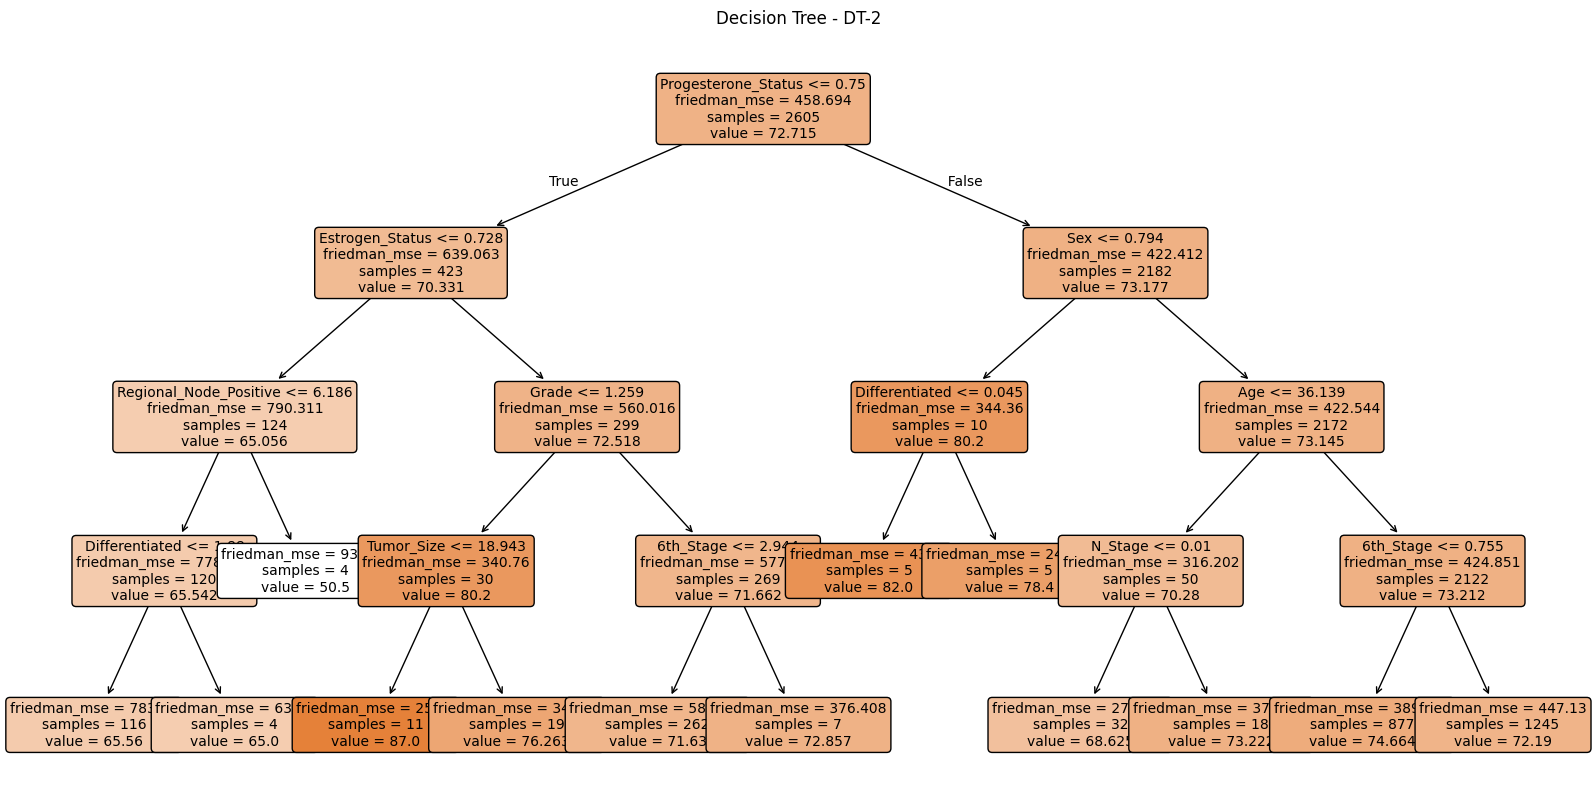

In [515]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# Load original and preprocessed datasets
original_df = pd.read_csv("cancer-dataset.csv")
regression_df = pd.read_csv("regression_dataset.csv")

# Load the trained pruned model (DT-2)
dt_model = joblib.load("best_dt_regression_model.pkl")

# Step 1: Extract Patient A0014
patient_row = original_df[original_df['Patient_ID'] == 'A0014'].copy()

# Step 2: Ensure the patient data is selected correctly
if patient_row.empty:
    print("Patient A0014 not found in the dataset.")
else:
    print(f"Patient A0014 data:\n{patient_row}")

# Step 3: Preprocess patient_row to match training
categorical_cols = ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                    'A_Stage', 'Estrogen_Status', 'Progesterone_Status']

# Label encoding - reuse the same mapping from training
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on original dataset for consistent mapping
    le.fit(original_df[col].astype(str))
    label_encoders[col] = le
    patient_row[col] = le.transform(patient_row[col].astype(str))

# Fix column typo
if 'Reginol_Node_Positive' in patient_row.columns:
    patient_row.rename(columns={'Reginol_Node_Positive': 'Regional_Node_Positive'}, inplace=True)

# Drop unused columns
patient_row.drop(columns=['Patient_ID', 'Occupation', 'Mortality_Status'], inplace=True, errors='ignore')

# Fill any missing values
fill_values = {
    'Age': regression_df['Age'].median(),
    'Tumor_Size': regression_df['Tumor_Size'].median(),
    'Regional_Node_Examined': regression_df['Regional_Node_Examined'].median()
}
for col, val in fill_values.items():
    if col in patient_row.columns:
        patient_row[col].fillna(val, inplace=True)

# Step 4: Check the columns before prediction
print(f"Columns in patient_row after preprocessing: {patient_row.columns.tolist()}")

# Step 5: Ensure patient_row is in correct 2D format and match feature names with training
train_features = dt_model.feature_names_in_

# Check if patient_row has all the features required by the model
missing_columns = set(train_features) - set(patient_row.columns)
if missing_columns:
    print(f"Missing columns for prediction: {missing_columns}")
else:
    # Align patient_row columns to match the model's features
    patient_row = patient_row[train_features]

    # Reshape into 2D array for prediction
    patient_row = patient_row.values.reshape(1, -1)

    # Predict survival months
    prediction = dt_model.predict(patient_row)[0]
    print(f"Predicted Survival Months for Patient A0014: {prediction:.2f}")

    # Add the predicted value to the patient data and create DataFrame for display
    patient_row_df = pd.DataFrame(patient_row, columns=train_features)
    patient_row_df['Predicted_Survival_Months'] = prediction

    # Display the result as a DataFrame
    print("\nPatient Data with Predicted Survival Months:")
    print(patient_row_df)

    # Step 6: Trace decision path (rules)
    tree_rules = export_text(dt_model, feature_names=train_features.tolist())
    print("\nDecision Tree Rules (DT-2):\n")
    print(tree_rules)

    # Step 7: Visualize the Decision Tree
    plt.figure(figsize=(20,10))  # Set figure size for better readability
    plot_tree(dt_model, feature_names=train_features, filled=True, rounded=True, fontsize=10)
    plt.title("Decision Tree - DT-2")
    plt.show()

# Predicting Survival Months Using Manually Inputted Data

Columns in patient_row after preprocessing: ['Month_of_Birth', 'Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Regional_Node_Positive']
Predicted Survival Months for Patient B002565: 68.62

Patient Data with Predicted Survival Months:
  Month_of_Birth   Age Sex T_Stage N_Stage 6th_Stage Differentiated Grade  \
0              6  29.0   1       2       0         4              0     2   

  A_Stage Tumor_Size Estrogen_Status Progesterone_Status  \
0       1       41.0               0                   1   

  Regional_Node_Examined Regional_Node_Positive  Predicted_Survival_Months  
0                    5.0                    1.0                     68.625  

Decision Tree Rules (DT-2):

|--- Progesterone_Status <= 0.75
|   |--- Estrogen_Status <= 0.73
|   |   |--- Regional_Node_Positive <= 6.19
|   |   |   |--- Differentiated <= 1.88
|   |   |   |   |--- value: [65.5

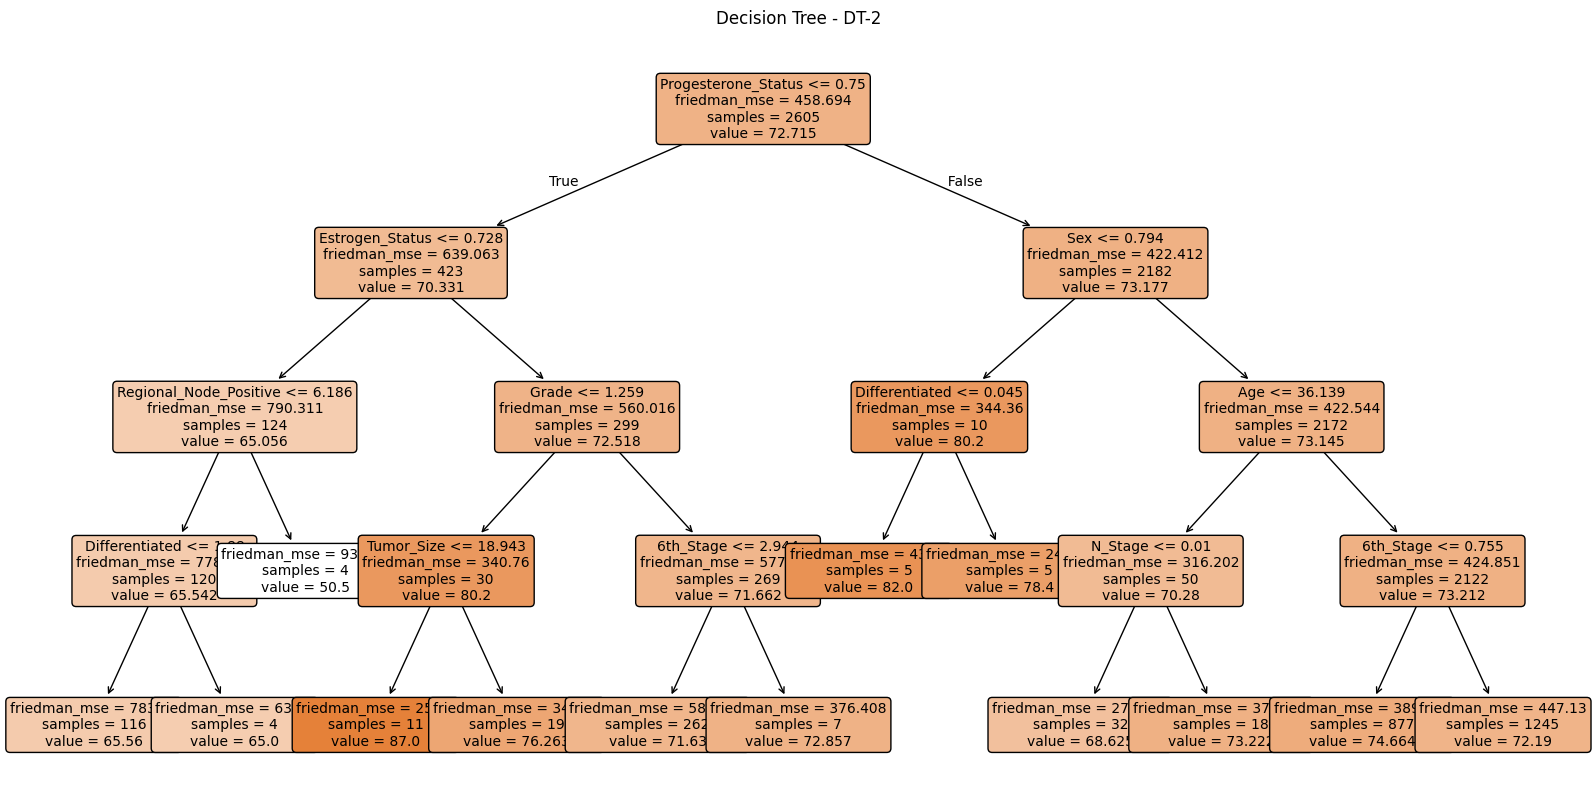

In [513]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# Load original and preprocessed datasets
original_df = pd.read_csv("cancer-dataset.csv")
regression_df = pd.read_csv("regression_dataset.csv")

# Load the trained pruned model (DT-2)
dt_model = joblib.load("best_dt_regression_model.pkl")

# Step 1: Manually create data for Patient B002565
patient_data = {
    'Patient_ID': 'B002565',
    'Month_of_Birth': '6',
    'Age': 29.0,
    'Sex': 'Female',
    'Occupation': 'Code 15',
    'T_Stage': 'T3',
    'N_Stage': 'N1',
    '6th_Stage': 'IIIC',
    'Differentiated': 'Moderately differentiated',
    'Grade': 2,
    'A_Stage': 'Regional',
    'Tumor_Size': 41.0,
    'Estrogen_Status': 'Negative',
    'Progesterone_Status': 'Positive',
    'Regional_Node_Examined': 5.0,
    'Regional_Node_Positive': 1.0
}

# Convert to DataFrame
patient_row = pd.DataFrame([patient_data])

# Step 2: Preprocess patient_row to match training
categorical_cols = ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                    'A_Stage', 'Estrogen_Status', 'Progesterone_Status']

# Label encoding - reuse the same mapping from training
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on original dataset for consistent mapping
    le.fit(original_df[col].astype(str))
    label_encoders[col] = le
    patient_row[col] = le.transform(patient_row[col].astype(str))

# Fix column typo
if 'Reginol_Node_Positive' in patient_row.columns:
    patient_row.rename(columns={'Reginol_Node_Positive': 'Regional_Node_Positive'}, inplace=True)

# Drop unused columns
patient_row.drop(columns=['Patient_ID', 'Occupation'], inplace=True, errors='ignore')

# Fill any missing values
fill_values = {
    'Age': regression_df['Age'].median(),
    'Tumor_Size': regression_df['Tumor_Size'].median(),
    'Regional_Node_Examined': regression_df['Regional_Node_Examined'].median()
}
for col, val in fill_values.items():
    if col in patient_row.columns:
        patient_row[col].fillna(val, inplace=True)

# Step 3: Check the columns before prediction
print(f"Columns in patient_row after preprocessing: {patient_row.columns.tolist()}")

# Step 4: Ensure patient_row is in correct 2D format and match feature names with training
train_features = dt_model.feature_names_in_

# Check if patient_row has all the features required by the model
missing_columns = set(train_features) - set(patient_row.columns)
if missing_columns:
    print(f"Missing columns for prediction: {missing_columns}")
else:
    # Align patient_row columns to match the model's features
    patient_row = patient_row[train_features]

    # Reshape into 2D array for prediction
    patient_row = patient_row.values.reshape(1, -1)

    # Predict survival months
    prediction = dt_model.predict(patient_row)[0]
    print(f"Predicted Survival Months for Patient: {prediction:.2f}")

    # Add the predicted value to the patient data and create DataFrame for display
    patient_row_df = pd.DataFrame(patient_row, columns=train_features)
    patient_row_df['Predicted_Survival_Months'] = prediction

    # Display the result as a DataFrame
    print("\nPatient Data with Predicted Survival Months:")
    print(patient_row_df)

    # Step 5: Trace decision path (rules)
    tree_rules = export_text(dt_model, feature_names=train_features.tolist())
    print("\nDecision Tree Rules (DT-2):\n")
    print(tree_rules)

    # Step 6: Visualize the Decision Tree
    plt.figure(figsize=(20,10))  # Set figure size for better readability
    plot_tree(dt_model, feature_names=train_features, filled=True, rounded=True, fontsize=10)
    plt.title("Decision Tree - DT-2")
    plt.show()